### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [67]:
data = pd.read_csv('data/coupons.csv')

In [69]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [72]:
#Print the dataset size
print("Total Data size",data.shape)

# Find columns with NaN values
columns_with_nan = data.columns[data.isnull().any()]
print("Columns with NaN values", columns_with_nan)

# Count the number of rows with at least one NaN value
num_rows_with_nan = data.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN",num_rows_with_nan)

# Print the data types for each columns
print(data.dtypes)

Total Data size (12684, 26)
Columns with NaN values Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')
Number of Rows with at least one NaN 12576
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y      

3. Decide what to do about your missing data -- drop, replace, other...

In [75]:
# Count the number of rows with at least one NaN value
num_rows_with_nan = data.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN in Raw data",num_rows_with_nan)

# Since number of rows with NaN is 12576 out of total rows of 12684, we cannot delete all rows with NaN. 
# Replace "car, Bar, CoffeeHouse" column NaN to "unknown"
data['car'] = data['car'].fillna("unknown")
data['Bar'] = data['Bar'].fillna("unknown")
data['CoffeeHouse'] = data['CoffeeHouse'].fillna("unknown")

# Count the number of rows with at least one NaN value
num_rows_with_nan = data.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN after setting unknown",num_rows_with_nan)

# Now with 386 rows, we cand delete these number of rows from the data for these columns ['CarryAway', 'RestaurantLessThan20','Restaurant20To50']
data_cleaned = data.dropna(subset=['CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])

# Count the number of rows with at least one NaN value
num_rows_with_nan_data_cleaned = data_cleaned.isnull().any(axis=1).sum()
print("Number of Rows with at least one NaN for clean data",num_rows_with_nan_data_cleaned)

# Print the head of data_cleaned and shape
print("Size of data_cleaned",data_cleaned.shape)
data_cleaned.head()

Number of Rows with at least one NaN in Raw data 12576
Number of Rows with at least one NaN after setting unknown 386
Number of Rows with at least one NaN for clean data 0
Size of data_cleaned (12298, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [78]:
# Proportion of observation to accept the coupon

proportion_accept = data_cleaned['Y'].sum()/len(data_cleaned)
print("Proportional of observations that choose to accept the coupon",proportion_accept)

Proportional of observations that choose to accept the coupon 0.5670027646771832


5. Use a bar plot to visualize the `coupon` column.

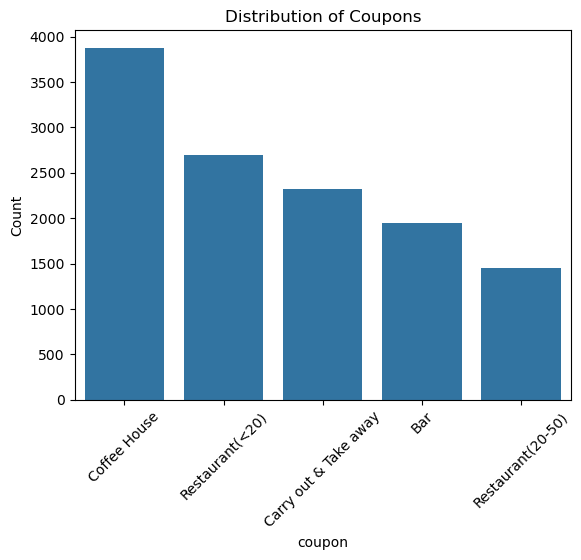

In [81]:
# Count the occurrences of each coupon
coupon_counts = data_cleaned['coupon'].value_counts()

# Create a bar plot
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

# Set titles and labels
plt.title('Distribution of Coupons')
plt.ylabel('Count')

# Show plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

6. Use a histogram to visualize the temperature column.

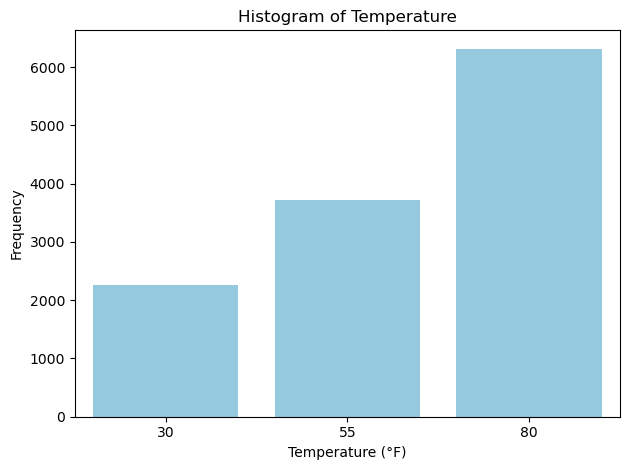

In [84]:

sns.countplot(data=data_cleaned, x='temperature', color='skyblue')

# Set titles and labels for Seaborn
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [91]:
# New dataframe with only Bar coupons

data_bar = data_cleaned[data_cleaned['coupon']=='Bar']
print("Number of rows with Bar coupons", len(data_bar))


Number of rows with Bar coupons 1952


2. What proportion of bar coupons were accepted?


In [94]:
# Proportion of observation to accept the "Bar" coupon 

proportion_accept_Bar = data_bar['Y'].sum()/len(data_bar)  # or using .mean()
print("Proportional of observations that choose to accept the 'Bar' coupon",proportion_accept_Bar)

Proportional of observations that choose to accept the 'Bar' coupon 0.4082991803278688


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Number of Rows with 'unknown' value  12
         Visit_Group         Y  acceptance_rate %
0   3 or fewer times  0.369266          36.926606
1  more than 3 times  0.765306          76.530612


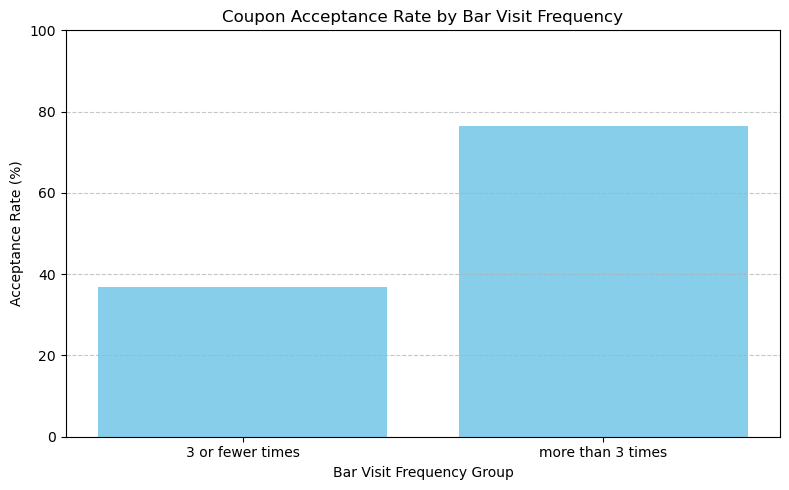

In [97]:
data_bar_frequency = data_bar[['Bar','Y']]

print("Number of Rows with 'unknown' value ",data_bar_frequency[data_bar_frequency['Bar'] == 'unknown'].shape[0])

# Removing the rows with 'unknown' value
data_bar_frequency = data_bar_frequency[data_bar_frequency['Bar'] != 'unknown']

# Categorize bar visits into two groups
data_bar_frequency['Visit_Group'] = data_bar_frequency['Bar'].apply(
    lambda x: '3 or fewer times' if x in ['never', 'less1', '1~3'] else 'more than 3 times'
)

# Calculate acceptance rates for each group
acceptance_rates = data_bar_frequency.groupby('Visit_Group')['Y'].mean().reset_index()
acceptance_rates['acceptance_rate %'] = acceptance_rates['Y'] * 100  # Convert to percentage

# Print acceptance rates
print(acceptance_rates)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(acceptance_rates['Visit_Group'], acceptance_rates['acceptance_rate %'], color='skyblue')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)  # Set y-axis limits to percentage range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [100]:
# Convert Age values
def convert_age(age):
    if age == 'below21':
        return 19  # assign a value below 20
    elif age == '50plus':
        return 51  # assign a value above 50
    else:
        return int(age)  # convert to integer for numeric values
        
data_bar_acceptance_age = data_bar[['Bar','age','Y']]

# Removing the rows with 'unknown' value
data_bar_acceptance_age = data_bar_acceptance_age[data_bar_acceptance_age['Bar'] != 'unknown']

# Convert 'Bar' values to categories for comparison
data_bar_acceptance_age['Bar'] = data_bar_acceptance_age['Bar'].map({'never': 0, 'less1': 0, '1~3': 1, '4~8': 2, 'gt8': 3})

# Add numeric age column
data_bar_acceptance_age['Numeric_Age'] = data_bar_acceptance_age['age'].apply(convert_age)

# Create a filter for drivers who go to a bar more than once a month and are over 25
group_1 = data_bar_acceptance_age[(data_bar_acceptance_age['Bar'] >= 1) & (data_bar_acceptance_age['Numeric_Age'] > 25)]

# Create a filter for all other drivers
group_2 = data_bar_acceptance_age[~((data_bar_acceptance_age['Bar'] >= 1) & (data_bar_acceptance_age['Numeric_Age'] > 25))]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Output the results
print(f"Acceptance Rate for Drivers > 25 and Go to Bar More than Once a Month: {acceptance_rate_group_1:.2f}")
print(f"Acceptance Rate for All Other Drivers: {acceptance_rate_group_2:.2f}")

# Check for significant difference
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print("Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.")
else:
    print("There is no significant difference in acceptance rates.")


Acceptance Rate for Drivers > 25 and Go to Bar More than Once a Month: 0.69
Acceptance Rate for All Other Drivers: 0.33
Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [103]:
data_bar_passanger_occupation = data_bar[['passanger','occupation','Bar','Y']]

# Removing the rows with 'unknown' value
data_bar_passanger_occupation = data_bar_passanger_occupation[data_bar_passanger_occupation['Bar'] != 'unknown']

# Step 1: Remove rows where Bar visits are more than once a month
data_bar_passanger_occupation_condition = data_bar_passanger_occupation[data_bar_passanger_occupation['Bar'].isin(['1~3','4~8', 'gt8'])]

# Step 2: Filter out rows with passengers that are not kids and occupations in farming, fishing & forestry
data_bar_passanger_occupation_condition = data_bar_passanger_occupation_condition[~data_bar_passanger_occupation_condition['passanger'].str.contains('Kid')]
data_bar_passanger_occupation_condition = data_bar_passanger_occupation_condition[data_bar_passanger_occupation_condition['occupation'] != 'Farming Fishing & Forestry']

# Step 3: Calculate the acceptance rate
acceptance_rate = data_bar_passanger_occupation_condition['Y'].mean()  # Assuming 'Y' is the column for coupon acceptance

# Step 4: Calculate acceptance rate for the rest of the data
other_data = data_bar_passanger_occupation[~data_bar_passanger_occupation.index.isin(data_bar_passanger_occupation_condition.index)]
other_acceptance_rate = other_data['Y'].mean()
# Step 5: Display results
print(f'Acceptance Rate (more than once a month, not kids, not farming): {acceptance_rate:.2f}')
print(f'Acceptance Rate (all others): {other_acceptance_rate:.2f}')

Acceptance Rate (more than once a month, not kids, not farming): 0.71
Acceptance Rate (all others): 0.29


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [106]:
# Convert Age values
def convert_age(age):
    if age == 'below21':
        return 19  # assign a value below 20
    elif age == '50plus':
        return 51  # assign a value above 50
    else:
        return int(age)  # convert to integer for numeric values

data_bar = data_bar.copy()

# Add numeric age column
data_bar['Numeric_Age'] = data_bar['age'].apply(convert_age)

# Getting all the unique values of 'RestaurantLessThan20' columns
#print(data_bar['RestaurantLessThan20'].unique())

# Step 1: Filter based on the provided conditions

# Condition 1: Go to bars more than once a month, have passengers that are not kids, and are not widowed
condition1 = (data_bar['Bar'].isin(['1~3','4~8', 'gt8'])) & \
              (~data_bar['passanger'].str.contains('kid')) & \
              (data_bar['maritalStatus'] != 'Widowed')

# Condition 2: Go to bars more than once a month and are under the age of 30
condition2 = (data_bar['Bar'].isin(['1~3','4~8', 'gt8'])) & (data_bar['Numeric_Age'] < 30)

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
condition3 = (data_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & \
              (data_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

# Step 2: Calculate acceptance rates for each condition
acceptance_rate_condition1 = data_bar[condition1]['Y'].mean()  # Assuming 'Y' is the column for coupon acceptance
acceptance_rate_condition2 = data_bar[condition2]['Y'].mean()
acceptance_rate_condition3 = data_bar[condition3]['Y'].mean()

# Step 3: Calculate acceptance rate for the combined conditions
combined_conditions = condition1 | condition2 | condition3
acceptance_rate_combined = data_bar[combined_conditions]['Y'].mean()

# Step 4: Display results
print(f'Acceptance Rate (Condition 1 - Bars > 1 month, Not a kid, Not widowed): {acceptance_rate_condition1:.2f}')
print(f'Acceptance Rate (Condition 2 - Bars > 1 month and Age < 30): {acceptance_rate_condition2:.2f}')
print(f'Acceptance Rate (Condition 3 - Restaurants > 4 times a month and Income < 50K): {acceptance_rate_condition3:.2f}')
print(f'Combined Acceptance Rate (All Conditions): {acceptance_rate_combined:.2f}')


Acceptance Rate (Condition 1 - Bars > 1 month, Not a kid, Not widowed): 0.69
Acceptance Rate (Condition 2 - Bars > 1 month and Age < 30): 0.72
Acceptance Rate (Condition 3 - Restaurants > 4 times a month and Income < 50K): 0.45
Combined Acceptance Rate (All Conditions): 0.57


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who engage in more social outings, particularly those who frequent bars more than once a month, tend to have a higher acceptance rate for bar coupons. This tendency is even more pronounced among drivers who are over 25, not accompanied by children, and have a moderate income. Drivers who fit these demographic and behavioral traits are likely more receptive to bar-related promotions, reflecting a potential alignment of social habits with promotional interests.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [111]:
# New dataframe with only Coffee House coupons
data_coffee = data_cleaned[data_cleaned['coupon']=='Coffee House']
print("Number of rows with Coffee House coupons", len(data_coffee))
data_coffee.head()

Number of rows with Coffee House coupons 3876


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [113]:
# Proportion of observation to accept the Coffee House coupons

proportion_accept_Coffee = data_coffee['Y'].sum()/len(data_coffee)  # or using .mean()
print("Proportional of observations that choose to accept the 'Coffee House' coupon",proportion_accept_Coffee)

Proportional of observations that choose to accept the 'Coffee House' coupon 0.4966460268317853


Number of Rows with 'unknown' value  44
  CoffeeHouse         Y  acceptance_rate %
0         1~3  0.647173          64.717349
1         4~8  0.682446          68.244576
2         gt8  0.657895          65.789474
3       less1  0.482564          48.256362
4       never  0.175223          17.522321


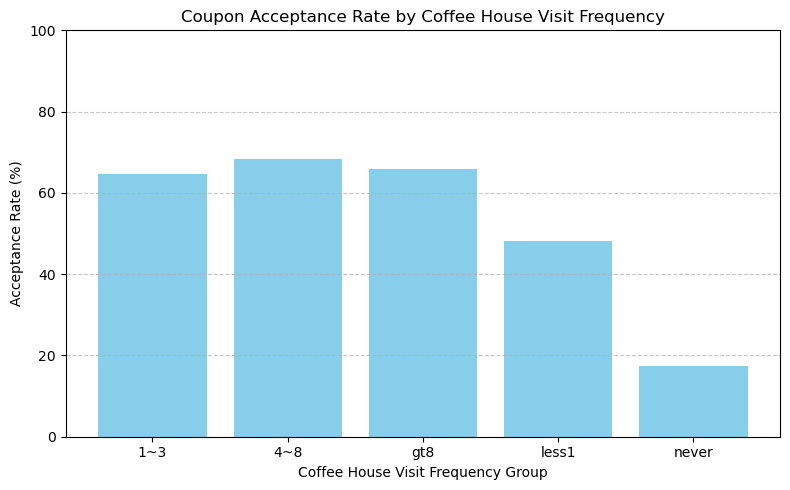

In [115]:
# Coffee Visit vs Coupon Acceptance

data_coffee_frequency = data_coffee[['CoffeeHouse','Y']]

print("Number of Rows with 'unknown' value ",data_coffee_frequency[data_coffee_frequency['CoffeeHouse'] == 'unknown'].shape[0])

# Removing the rows with 'unknown' value
data_coffee_frequency = data_coffee_frequency[data_coffee_frequency['CoffeeHouse'] != 'unknown']

# Calculate acceptance rates for each group
acceptance_rates = data_coffee_frequency.groupby('CoffeeHouse')['Y'].mean().reset_index()
acceptance_rates['acceptance_rate %'] = acceptance_rates['Y'] * 100  # Convert to percentage

# Print acceptance rates
print(acceptance_rates)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(acceptance_rates['CoffeeHouse'], acceptance_rates['acceptance_rate %'], color='skyblue')
plt.title('Coupon Acceptance Rate by Coffee House Visit Frequency')
plt.xlabel('Coffee House Visit Frequency Group')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)  # Set y-axis limits to percentage range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
# Compare the acceptance of Coffee House coupon with age

# Convert Age values
def convert_age(age):
    if age == 'below21':
        return 19  # assign a value below 20
    elif age == '50plus':
        return 51  # assign a value above 50
    else:
        return int(age)  # convert to integer for numeric values
        
data_coffee_acceptance_age = data_coffee[['CoffeeHouse','age','Y']]

# Removing the rows with 'unknown' value
data_coffee_acceptance_age = data_coffee_acceptance_age[data_coffee_acceptance_age['CoffeeHouse'] != 'unknown']

# Convert 'Bar' values to categories for comparison
data_coffee_acceptance_age['CoffeeHouse'] = data_coffee_acceptance_age['CoffeeHouse'].map({'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4})

# Add numeric age column
data_coffee_acceptance_age['Numeric_Age'] = data_coffee_acceptance_age['age'].apply(convert_age)

# Create a filter for drivers who go to a bar more than once a month and are over 25
group_1 = data_coffee_acceptance_age[(data_coffee_acceptance_age['CoffeeHouse'] > 1) & (data_coffee_acceptance_age['Numeric_Age'] < 21)]

# Create a filter for all other drivers
group_2 = data_coffee_acceptance_age[~((data_coffee_acceptance_age['CoffeeHouse'] > 1) & (data_coffee_acceptance_age['Numeric_Age'] < 21))]

# Calculate acceptance rates
acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()

# Output the results
print(f"Acceptance Rate for Drivers < 21 and Go to CoffeeHouse More than Once a Month: {acceptance_rate_group_1:.2f}")
print(f"Acceptance Rate for All Other Drivers: {acceptance_rate_group_2:.2f}")

# Check for significant difference
if acceptance_rate_group_1 > acceptance_rate_group_2:
    print("Drivers who go to a Coffee House more than once a month and below 21 have a higher acceptance rate.")
else:
    print("There is no significant difference in acceptance rates.")



Acceptance Rate for Drivers < 21 and Go to CoffeeHouse More than Once a Month: 0.75
Acceptance Rate for All Other Drivers: 0.49
Drivers who go to a Coffee House more than once a month and below 21 have a higher acceptance rate.


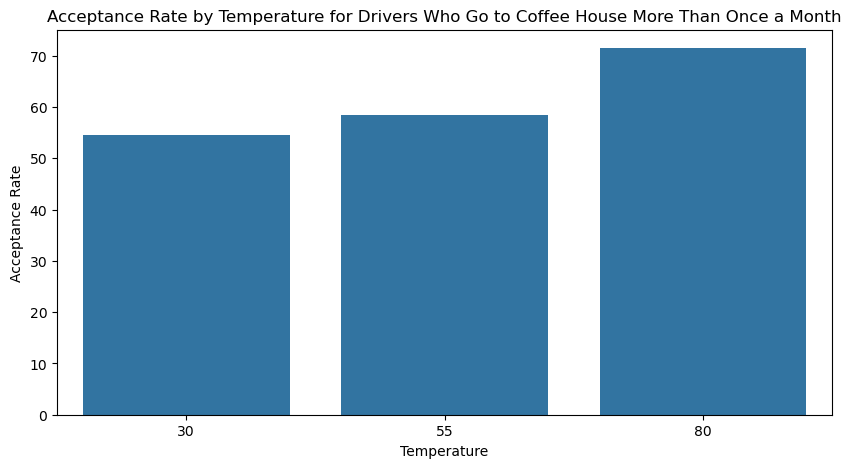

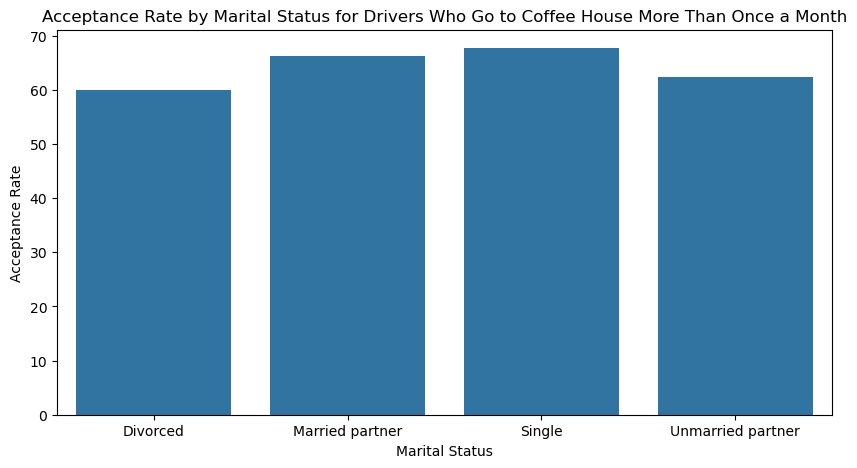

In [119]:
#

# Filter data for drivers who go to a coffee house more than once a month
df_coffee_more_than_once = data_coffee[data_coffee['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])]

# Calculate acceptance rates based on temperature
acceptance_rate_temp = (
    df_coffee_more_than_once.groupby('temperature')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'Acceptance_Rate_Temperature'})
)

# Calculate acceptance rates based on marital status
acceptance_rate_marital = (
    df_coffee_more_than_once.groupby('maritalStatus')['Y']
    .mean()
    .reset_index()
    .rename(columns={'Y': 'Acceptance_Rate_MaritalStatus'})
)

acceptance_rate_temp['Acceptance_Rate_Temperature'] *= 100
acceptance_rate_marital['Acceptance_Rate_MaritalStatus'] *= 100

# Plot acceptance rate by temperature
plt.figure(figsize=(10, 5))
sns.barplot(data=acceptance_rate_temp, x='temperature', y='Acceptance_Rate_Temperature')
plt.title('Acceptance Rate by Temperature for Drivers Who Go to Coffee House More Than Once a Month')
plt.xlabel('Temperature')
plt.ylabel('Acceptance Rate')
plt.show()

# Plot acceptance rate by marital status
plt.figure(figsize=(10, 5))
sns.barplot(data=acceptance_rate_marital, x='maritalStatus', y='Acceptance_Rate_MaritalStatus')
plt.title('Acceptance Rate by Marital Status for Drivers Who Go to Coffee House More Than Once a Month')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.show()

# Display results
#print("Acceptance Rate by Temperature for drivers who go to coffee house more than once a month:")
#print(acceptance_rate_temp)

#print("\nAcceptance Rate by Marital Status for drivers who go to coffee house more than once a month:")
#print(acceptance_rate_marital)

### Observations and Hypothesis for Coffee House Coupons

**Observations:**
1. Acceptance rates for drivers who go to coffee houses more than once a month vary by temperature:
   - At 30°F, the acceptance rate is **54.55%**.
   - At 55°F, the acceptance rate increases to **58.50%**.
   - At 80°F, the acceptance rate further increases to **71.51%**.

2. Acceptance rates for drivers who go to coffee houses more than once a month vary by marital status:
   - Divorced individuals have an acceptance rate of **60.00%**.
   - Married partners have a rate of **66.18%**.
   - Singles have a higher acceptance rate of **67.70%**.
   - Unmarried partners have an acceptance rate of **62.31%**.

3. Drivers under 21 who go to coffee houses more than once a month have an acceptance rate of **75.00%**, which is significantly higher than the acceptance rate of **49.00%** for all other drivers.

4. Acceptance rates based on coffee house visits:
   - 1-3 times: **64.72%**
   - 4-8 times: **68.24%**
   - Greater than 8 times: **65.79%**
   - Less than once: **48.26%**
   - Never: **17.52%**

**Hypothesis on driver who accept Coffee House coupons:**
1. There is a positive correlation between temperature and coupon acceptance rates among drivers who frequently visit coffee houses.
2. Marital status influences acceptance rates, with single individuals showing the highest acceptance rates.
3. Younger drivers (under 21) have a higher tendency to accept coupons compared to older drivers.
4. Increased frequency of coffee house visits is associated with higher acceptance rates for coupons.
